# Example 6: String Operations Snowiest Month

We saw earlier that pandas is really good at dealing with dates.

We're going to go back to our weather data from Chapter 5, here.

In [7]:
#---Import necessary libraries and render plots inline---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [8]:
#---Read in CSV file with appropriate parsing arguments---

# Parse dates in the "Date" column
# Set index to be the "Date/Time" column

weather_2012 = pd.read_csv("/Users/cheon/Documents/GitHub/pandas-cookbook/data/weather_2012.csv", parse_dates=["Date/Time"], index_col="Date/Time")

weather_2012.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


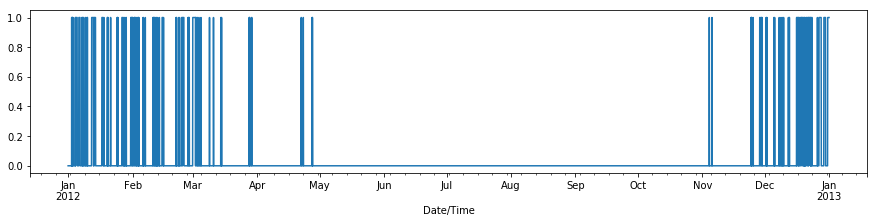

In [9]:
#---Determine which rows had snowing---

is_snowing = weather_2012["Weather"].str.contains("Snow")

is_snowing.astype(int).plot()

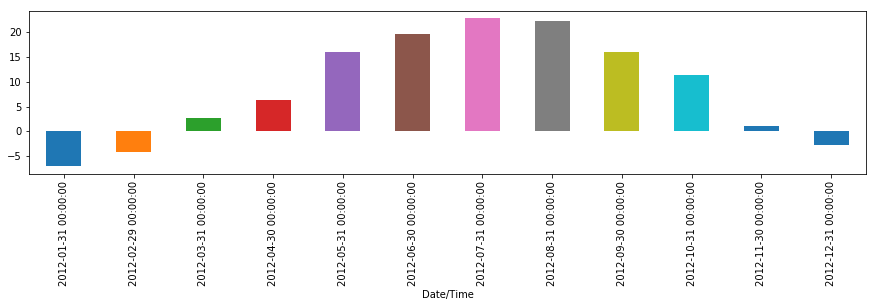

In [10]:
#---Use resampling to find the median temperature for each month---

weather_2012["Temp (C)"].resample("M").apply("median").plot(kind="bar")

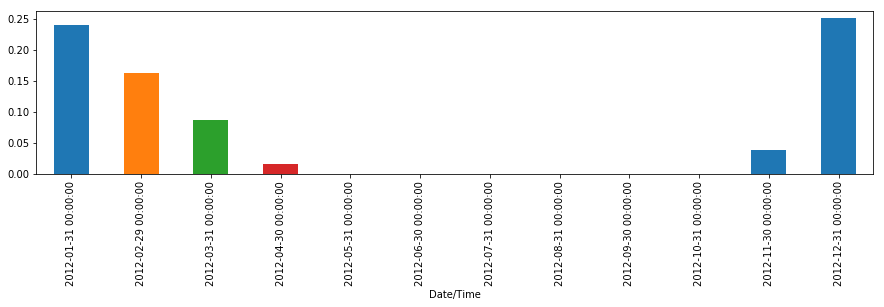

In [11]:
#---Use resampling to find the snowiest month---

is_snowing.resample("M").apply("mean").plot(kind="bar")

In [12]:
#---Combine above two series into a dataframe---

temperature = weather_2012["Temp (C)"].resample("M").apply("median")
temperature.name = "Temperature"

is_snowing = weather_2012["Weather"].str.contains("Snow")
snowiness = is_snowing.astype(float).resample("M").apply("mean")
snowiness.name = "Snowiness"

stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000220FA375DD8>,
      dtype=object)

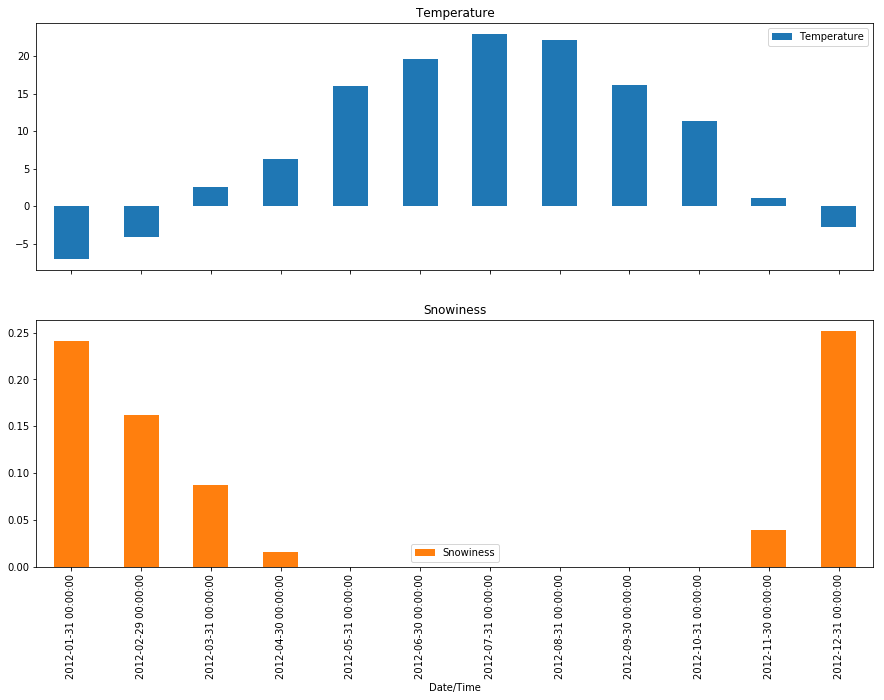

In [13]:
stats.plot(kind="bar", subplots=True, figsize=(15,10))